sdi1600042 Eleftherios Dimitras

sdi1600119 Michael Xanthopoulos

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import collections       as col

%matplotlib inline

In [5]:
df = pd.read_csv("./crime.csv" , sep = "\t", delimiter=",", low_memory=False)
df = df.fillna('N')

Tokenizing the tweets :

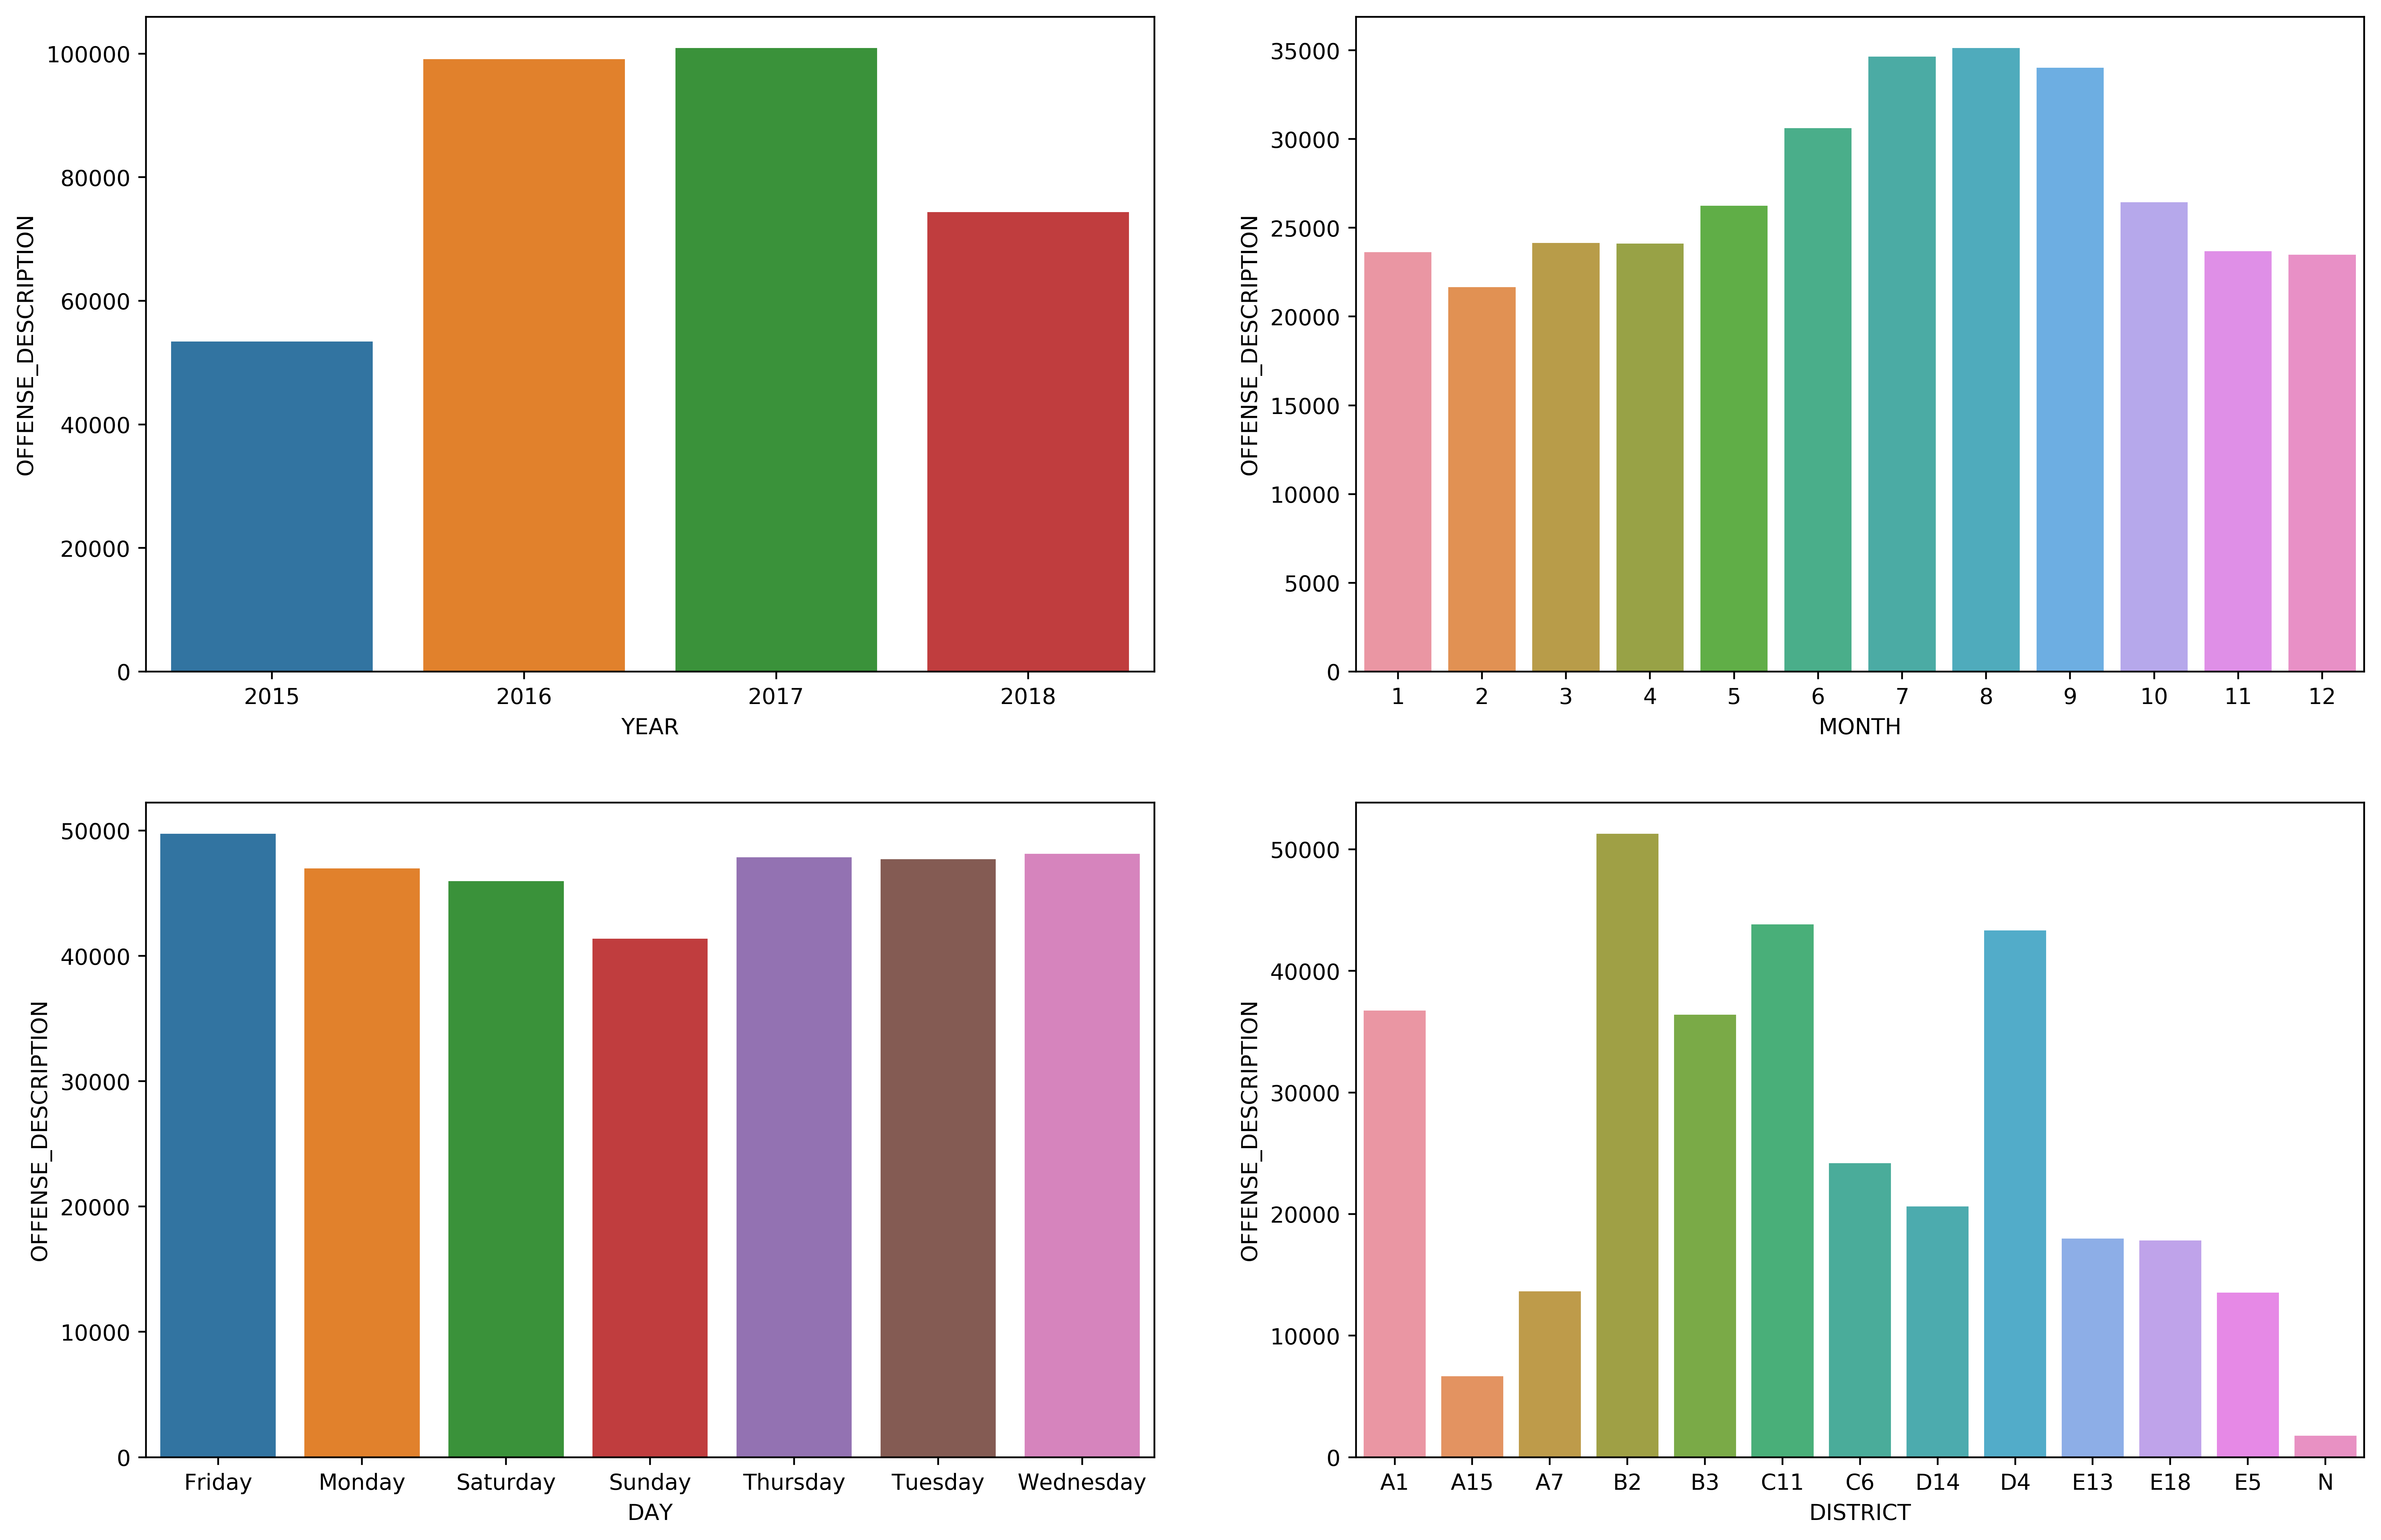

In [3]:
fig = plt.figure(figsize=(18,12), dpi=500)

gpdata = df.groupby('YEAR').count()
lst = []
for data in gpdata.iterrows():
    
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
ldf = pd.DataFrame(lst , columns=['YEAR' , 'OFFENSE_DESCRIPTION'])

ax1 = plt.subplot2grid((2,2),(0,0))
ax = sns.barplot(x='YEAR' , y='OFFENSE_DESCRIPTION' , data=ldf)

# --------------------------------------------------------------------------- #

gpdata = df.groupby('MONTH').count()
lst = []
for data in gpdata.iterrows():
    
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
    
ldf = pd.DataFrame(lst , columns=['MONTH' , 'OFFENSE_DESCRIPTION'])

ax1 = plt.subplot2grid((2,2), (0, 1))
ax = sns.barplot(x='MONTH' , y='OFFENSE_DESCRIPTION' , data=ldf)

# --------------------------------------------------------------------------- #

gpdata = df.groupby('DAY_OF_WEEK').count()
lst = []
for data in gpdata.iterrows():
    
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
    
ldf = pd.DataFrame(lst , columns=['DAY' , 'OFFENSE_DESCRIPTION'])

ax1 = plt.subplot2grid((2,2), (1, 0))
ax = sns.barplot(x='DAY' , y='OFFENSE_DESCRIPTION' , data=ldf)

# --------------------------------------------------------------------------- #

gpdata = df.groupby('DISTRICT').count()
lst = []
for data in gpdata.iterrows():
    
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
    
ldf = pd.DataFrame(lst , columns=['DISTRICT' , 'OFFENSE_DESCRIPTION'])

ax1 = plt.subplot2grid((2,2), (1, 1))
ax = sns.barplot(x='DISTRICT' , y='OFFENSE_DESCRIPTION' , data=ldf)

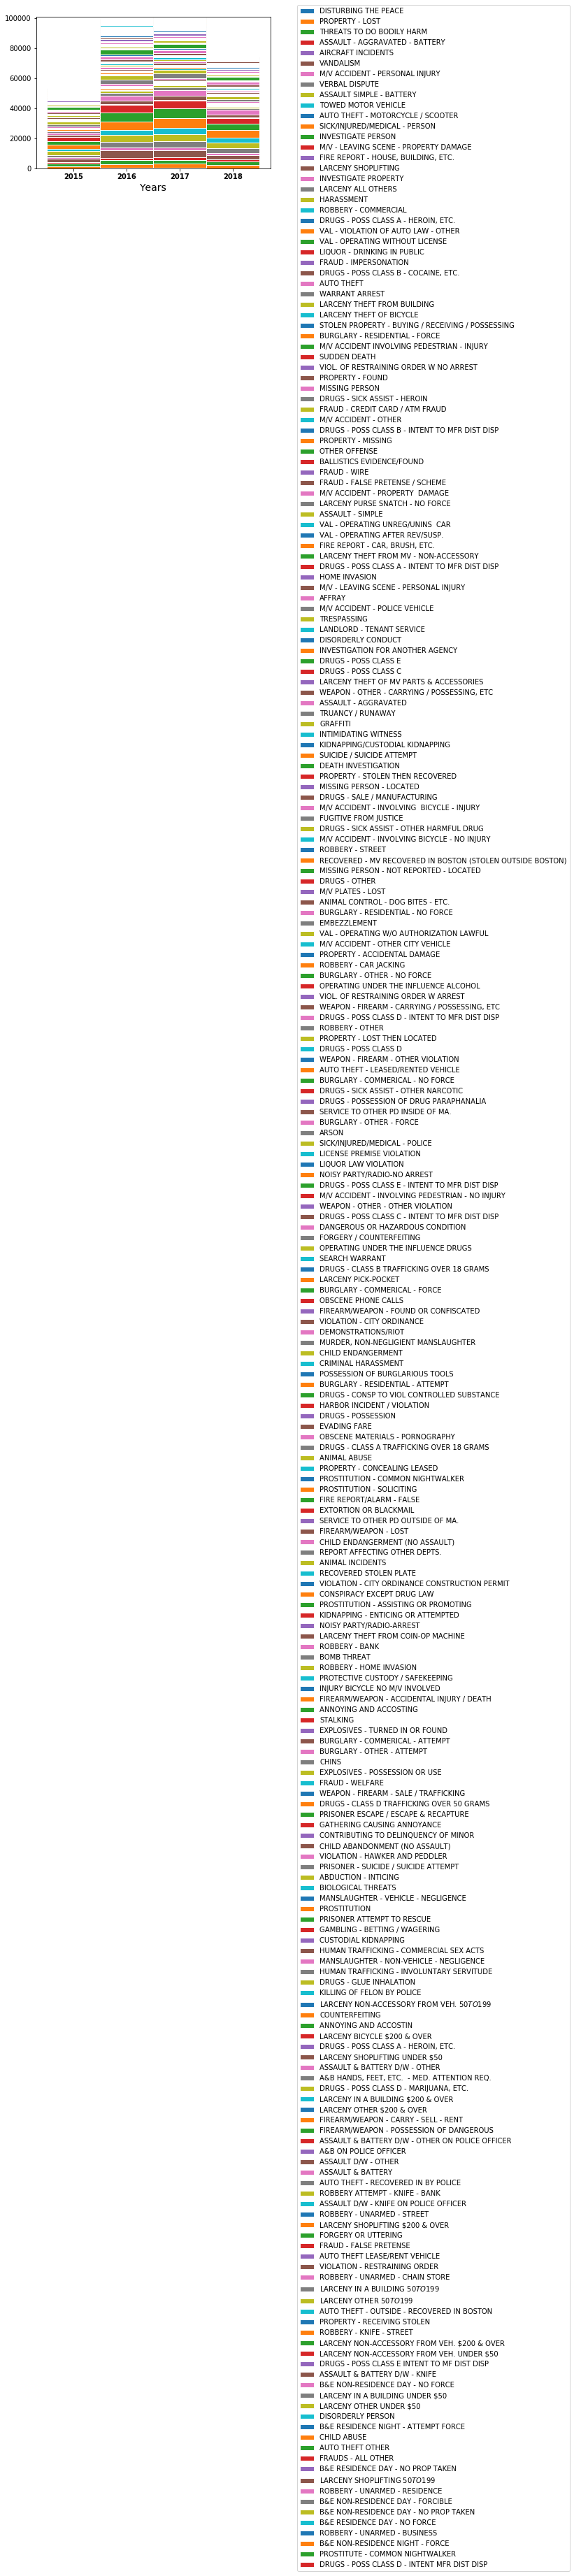

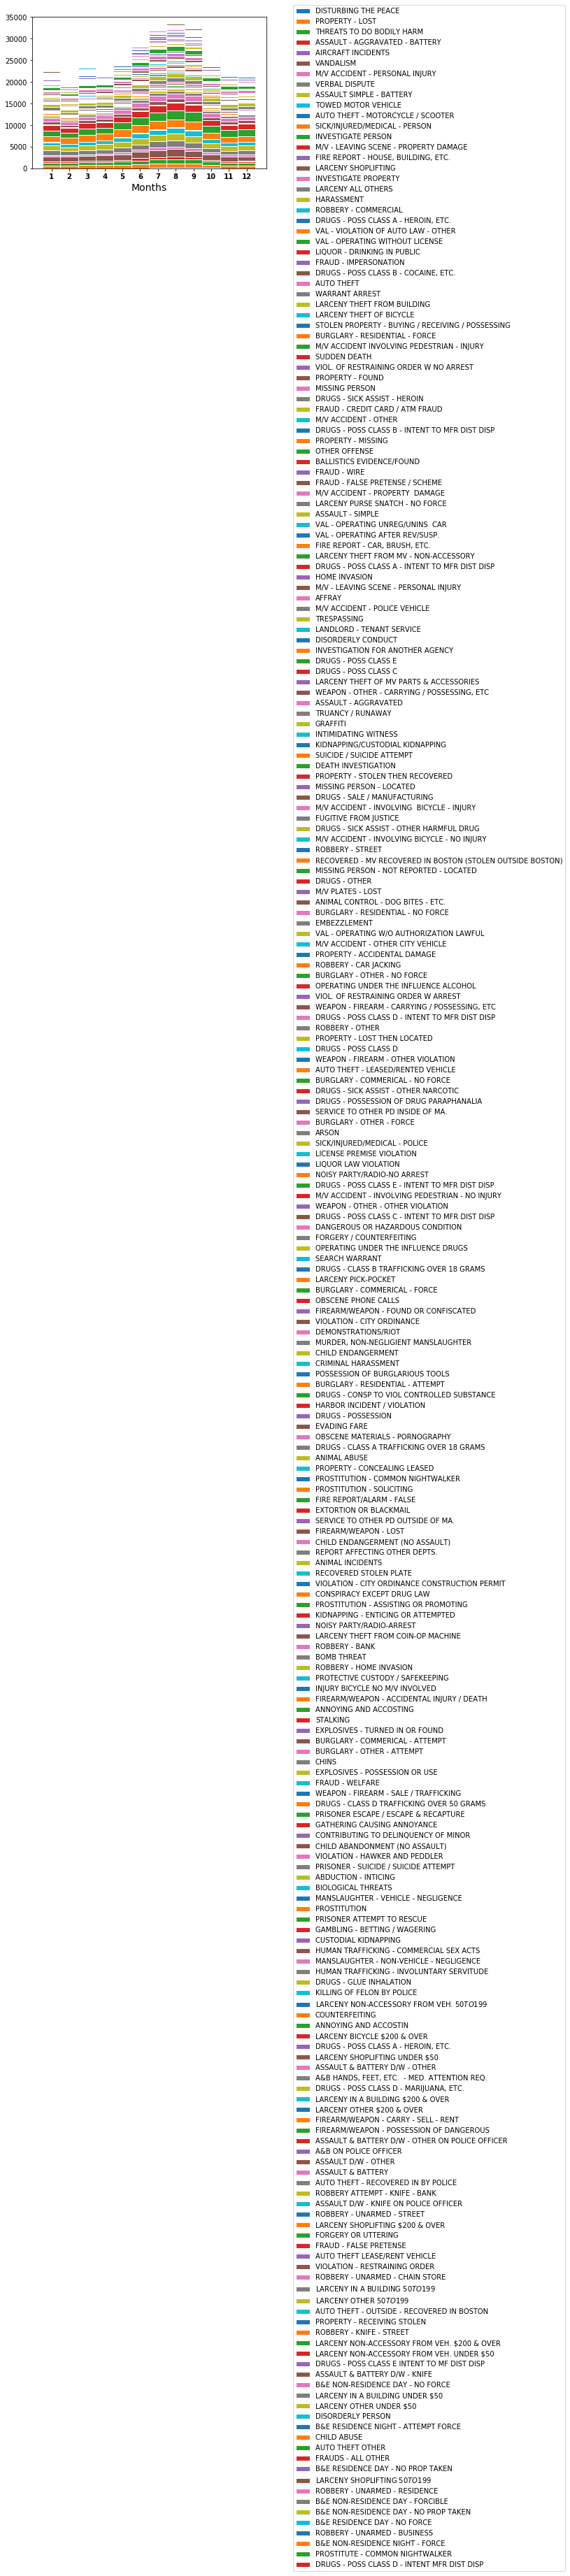

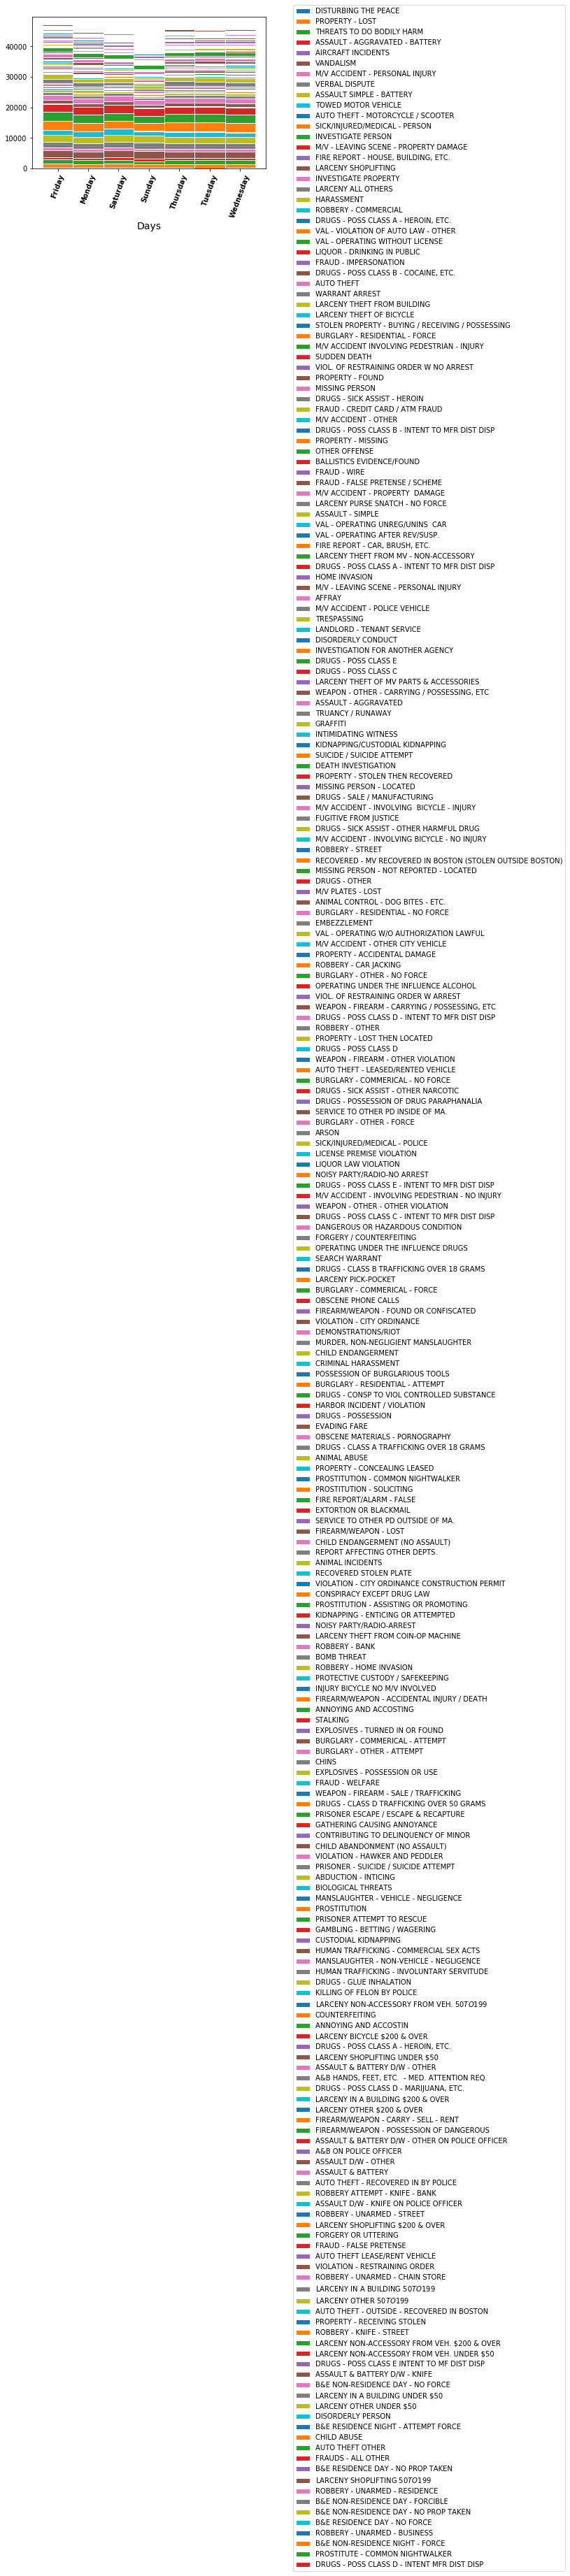

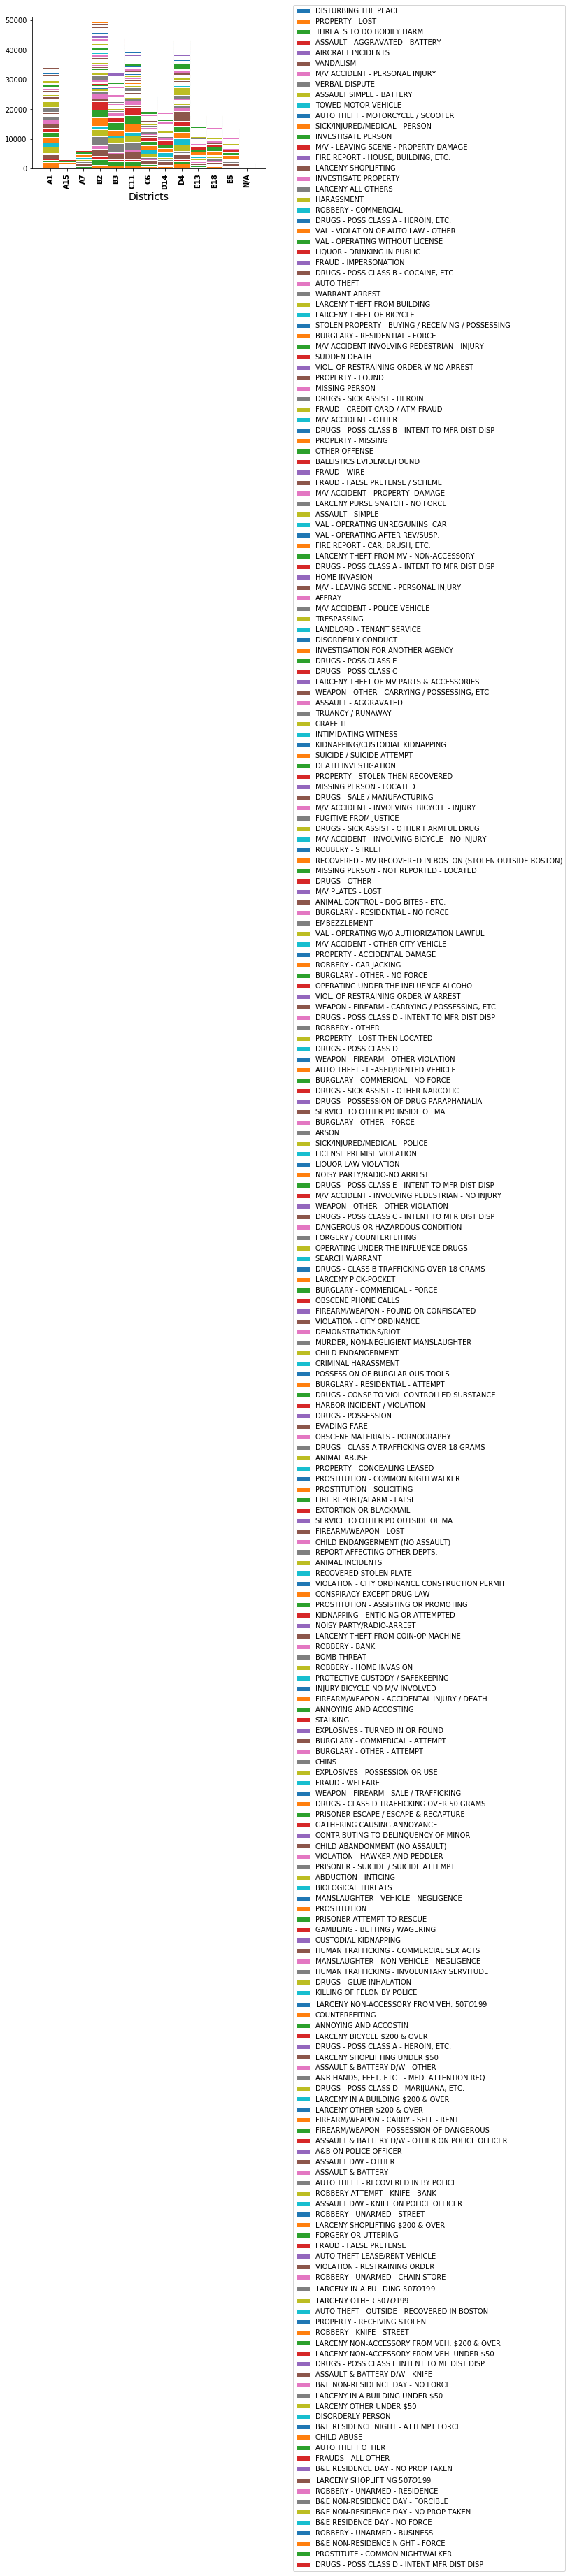

In [4]:
dl = df.values.tolist()

crimes    = col.defaultdict(lambda: 0)
years     = col.defaultdict(lambda: 0)
months    = col.defaultdict(lambda: 0)
days      = col.defaultdict(lambda: 0)
districts = col.defaultdict(lambda: 0)

bars_yr = col.defaultdict(lambda: 0)
bars_mn = col.defaultdict(lambda: 0)
bars_da = col.defaultdict(lambda: 0)
bars_di = col.defaultdict(lambda: 0)

cr_cnt=0
for tok in dl:

    bars_yr[tok[3]] = None
    bars_mn[tok[3]] = None
    bars_da[tok[3]] = None
    bars_di[tok[3]] = None    

    if tok[3] not in crimes.keys():
        crimes[tok[3]] = cr_cnt
        cr_cnt += 1
    
    years [tok[8]]  = None
    months[tok[9]]  = None
    days  [tok[10]] = None
    
    if tok[4] == 'N':
        districts['N/A']  = None
    else:
        districts[tok[4]] = None


years     = col.OrderedDict(sorted(years.items()))
months    = col.OrderedDict(sorted(months.items()))
days      = col.OrderedDict(sorted(days.items()))
districts = col.OrderedDict(sorted(districts.items()))


for i,key in enumerate(years.keys()):
    years[key] = i

for i,key in enumerate(months.keys()):
    months[key] = i

for i,key in enumerate(days.keys()):
    days[key] = i

for i,key in enumerate(districts.keys()):
    districts[key] = i


for item in crimes:
    bars_yr[item] = [0 for i in years    .keys()]
    bars_mn[item] = [0 for i in months   .keys()]
    bars_da[item] = [0 for i in days     .keys()]
    bars_di[item] = [0 for i in districts.keys()]


# The position of the bars on the x-axis
x_axis_cr = [i for i,_ in enumerate(crimes   .keys())]
x_axis_yr = [i for i,_ in enumerate(years    .keys())]
x_axis_mn = [i for i,_ in enumerate(months   .keys())]
x_axis_da = [i for i,_ in enumerate(days     .keys())]
x_axis_di = [i for i,_ in enumerate(districts.keys())]

# Names of group
label_names_cr = [key for key in crimes   .keys()]
label_names_yr = [key for key in years    .keys()]
label_names_mn = [key for key in months   .keys()]
label_names_da = [key for key in days     .keys()]
label_names_di = [key for key in districts.keys()]

for tok in dl:
    bars_yr[tok[3]][years[tok[8]]]  += 1
    bars_mn[tok[3]][months[tok[9]]] += 1
    bars_da[tok[3]][days[tok[10]]]  += 1

    if tok[4] == 'N':
        bars_di[tok[3]][districts['N/A']]  += 1
    else:
        bars_di[tok[3]][districts[tok[4]]] += 1

bars = [0 for i in years.keys()]
barWidth = 1
legends_yr = []
for key,val in bars_yr.items():
    pl = plt.bar(x_axis_yr, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_yr.append(pl)
    bars = np.add(bars,val).tolist()

plt.xlabel('Years', fontsize=14)
plt.xticks(x_axis_yr, label_names_yr, fontweight='bold')
plt.legend((pl[0] for pl in legends_yr), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()

    
bars = [0 for i in months.keys()]
legends_mn = []
for key,val in bars_mn.items():
    pl = plt.bar(x_axis_mn, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_mn.append(pl)
    bars = np.add(bars,val).tolist()
    
plt.xlabel('Months', fontsize=14)
plt.xticks(x_axis_mn, label_names_mn, fontweight='bold')
plt.legend((pl[0] for pl in legends_mn), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()

bars = [0 for i in days.keys()]
legends_da = []
for key,val in bars_da.items():
    pl = plt.bar(x_axis_da, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_da.append(pl)
    bars = np.add(bars,val).tolist()

plt.xlabel('Days', fontsize=14)
plt.xticks(x_axis_da, label_names_da, fontweight='bold', rotation=70)
plt.legend((pl[0] for pl in legends_da), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()


bars = [0 for i in districts.keys()]
legends_di = []
for key,val in bars_di.items():
    pl = plt.bar(x_axis_di, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_di.append(pl)
    bars = np.add(bars,val).tolist()

plt.xlabel('Districts', fontsize=14)
plt.xticks(x_axis_di, label_names_di, fontweight='bold', rotation=90)
plt.legend((pl[0] for pl in legends_di), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()

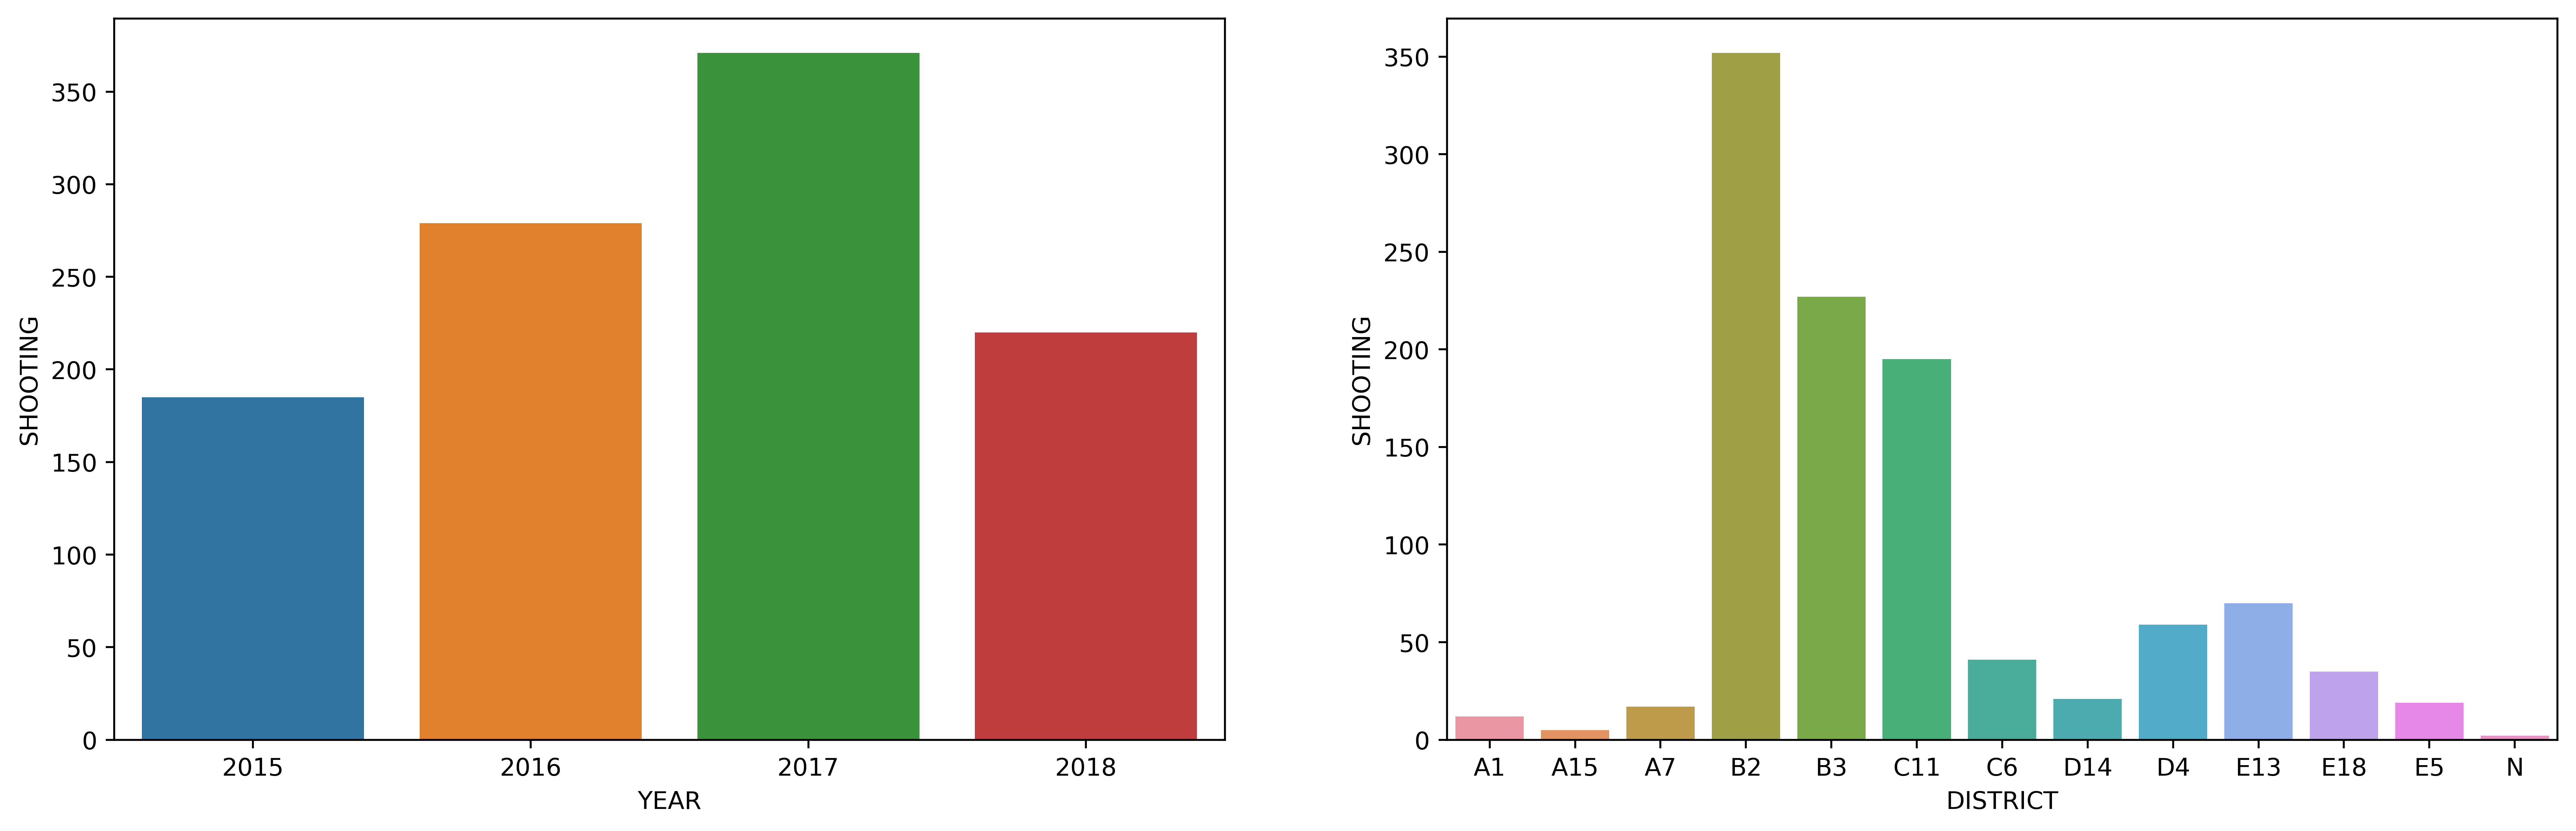

In [29]:
fig = plt.figure(figsize=(18,12), dpi=500)

gpdata = df[df.SHOOTING == 'Y'].groupby('YEAR').count()
lst = []
for data in gpdata.iterrows():
    
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
    
ldf = pd.DataFrame(lst , columns=['YEAR' , 'SHOOTING'])

ax1 = plt.subplot2grid((2,2),(0,0))
ax = sns.barplot(x='YEAR' , y='SHOOTING' , data=ldf)

# --------------------------------------------------------------------------- #

gpdata = df[df.SHOOTING == 'Y'].groupby('DISTRICT').count()
lst = []
for data in gpdata.iterrows():
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
ldf = pd.DataFrame(lst , columns=['DISTRICT' , 'SHOOTING'])

ax1 = plt.subplot2grid((2,2), (0, 1))
ax = sns.barplot(x='DISTRICT' , y='SHOOTING' , data=ldf)

In [105]:
day_night = []

for i,col in enumerate(df.values):
    if col[11] <= 6 or col[11] >= 18:
        day_night.append('Night')
    else:
        day_night.append('Day')

df.insert(17, "Day/Night", day_night, True)
# df = df.drop(columns=["Day/Night"])

# for i,col in enumerate(df.values):
#     print(col)
    
#     if i == 25:
#         break

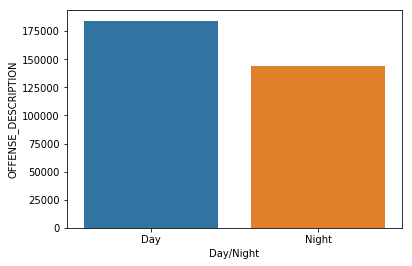

In [110]:
gpdata = df.groupby('Day/Night').count()
lst = []
for data in gpdata.iterrows():
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
ldf = pd.DataFrame(lst , columns=['Day/Night' , 'OFFENSE_DESCRIPTION'])

ax = sns.barplot(x='Day/Night' , y='OFFENSE_DESCRIPTION' , data=ldf)

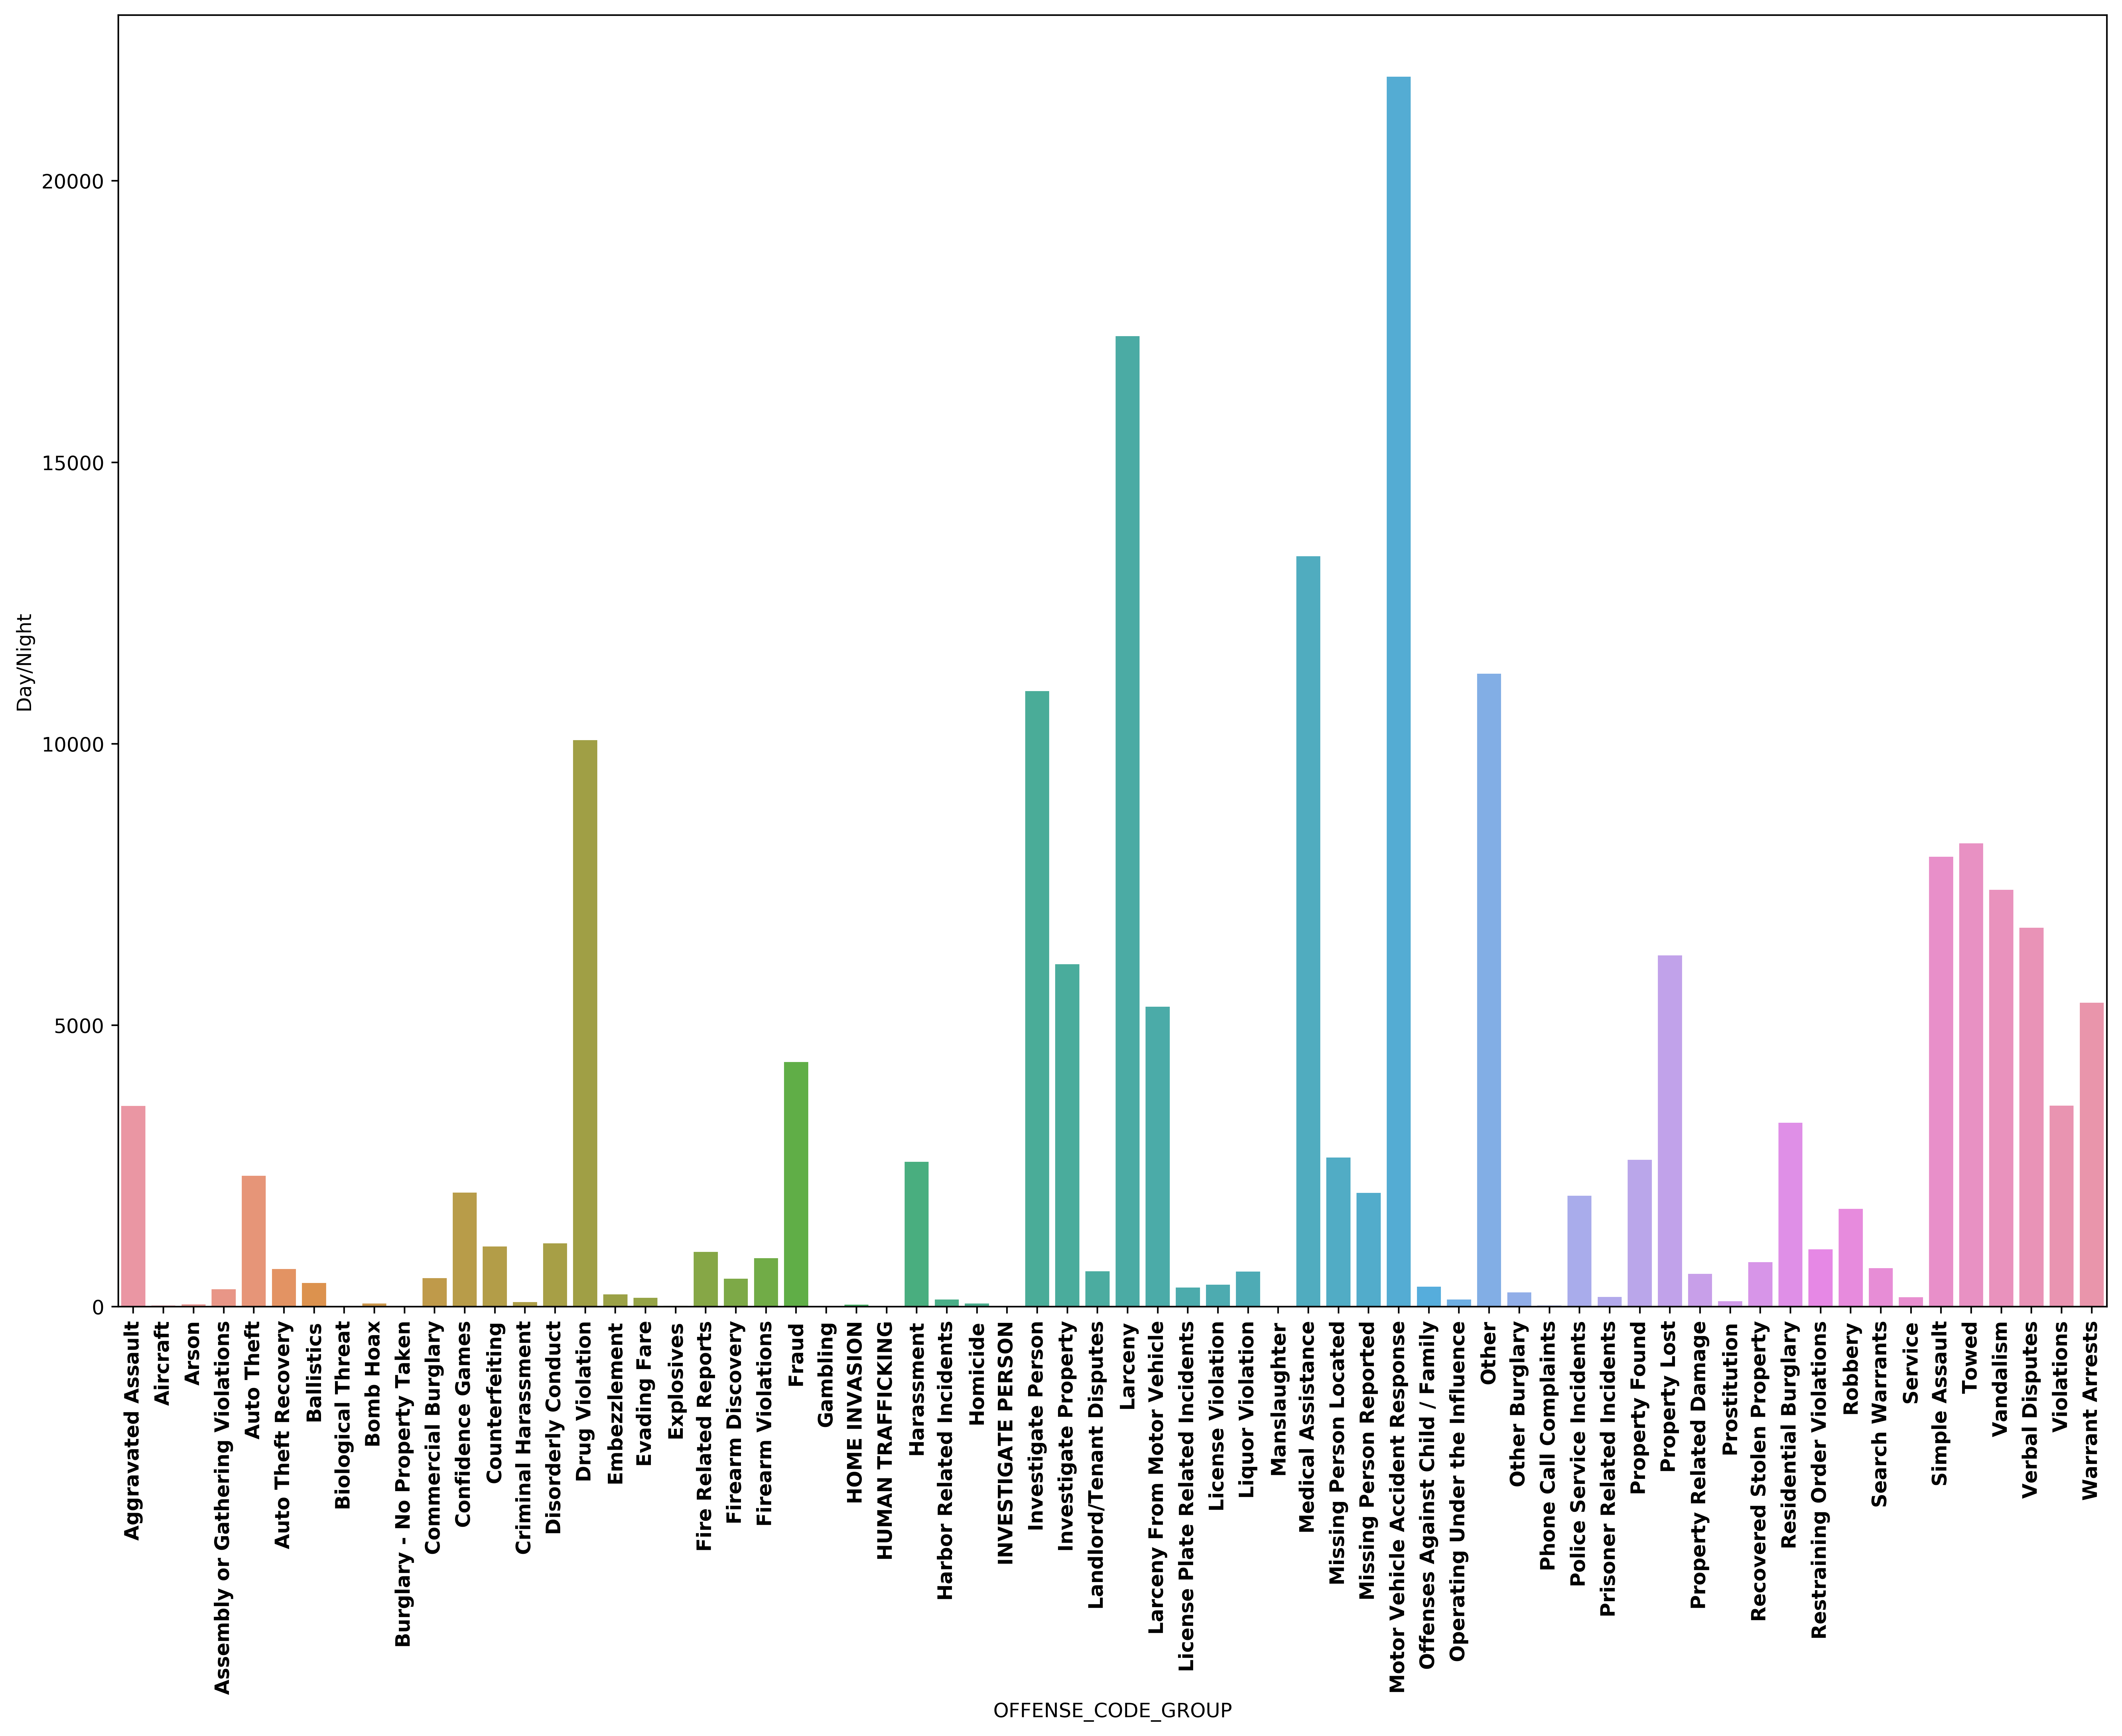

In [124]:
fig = plt.figure(figsize=(18,12), dpi=500)

gpdata = df[df['Day/Night'] == 'Day'].groupby('OFFENSE_CODE_GROUP').count()
lst = []
for data in gpdata.iterrows():
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
ldf = pd.DataFrame(lst , columns=['OFFENSE_CODE_GROUP' , 'Day/Night'])

plt.xticks(fontweight='bold', rotation=90)
ax = sns.barplot(x='OFFENSE_CODE_GROUP' , y='Day/Night' , data=ldf)

In [7]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

location = df[['Lat','Long']]
location = location.dropna()
location = location.loc[(location['Lat']>40) & (location['Long']<-60)]
location.head()

# km = KMeans(n_clusters=3)
# km.fit(df)
# km.predict(df)

TypeError: '>' not supported between instances of 'str' and 'int'